<a href="https://colab.research.google.com/github/01-vyom/Machine-Learning-Projects/blob/master/Kaggle/%20House%20Prices%3A%20Advanced%20Regression%20Techniques/Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# first step is to import the libraries that are currently required
import pandas as pd
import matplotlib.pyplot as plt
%tensorflow_version 2.x
# x_data = range(0,l_data.shape[0]
import seaborn as sns
#LotFrontage
#LotArea
#YearBuilt
#TotalBsmtsf
#GarageArea
#PoolArea
import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.python.data import Dataset
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
pd.options.display.max_rows = 25
pd.options.display.float_format = '{:.5f}'.format
tf.random.set_seed(123)

In [0]:
Ames_House_data = pd.read_csv("/content/drive/My Drive/House Price Prediction/train.csv")
Ames_House_data['LotFrontage'].fillna(70,inplace=True)
Ames_House_data['MasVnrArea'].fillna(103.7,inplace=True)
Ames_House_data['GarageYrBlt'].fillna(1.8,inplace=True)

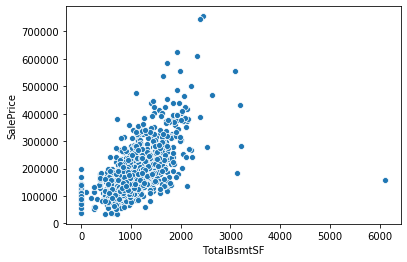

In [0]:
 sns.scatterplot(x=Ames_House_data["TotalBsmtSF"],y=Ames_House_data["SalePrice"])

In [0]:
#LotConfig
#LotShape
#Neighbor
#Foundation
#SaleCondition
chars1 = Ames_House_data[['LotConfig','Neighborhood','LotShape','Foundation','SaleCondition']]
chars1.describe()

,LotConfig,Neighborhood,LotShape,Foundation,SaleCondition
count,1460,1460,1460,1460,1460
unique,5,25,4,6,6
top,Inside,NAmes,Reg,PConc,Normal
freq,1052,225,925,647,1198


In [0]:
chars1.head()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
nums = Ames_House_data.select_dtypes(include=numerics)
y_train = Ames_House_data.pop("SalePrice")
Ames_House_data = Ames_House_data[['LotConfig','Neighborhood','LotShape','Foundation','SaleCondition','OverallQual', 'GrLivArea','GarageCars','1stFlrSF','YearBuilt']]
nums.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000
mean,730.50000,56.89726,70.04110,10516.82808,6.09932,5.57534,1971.26781,1984.86575,103.68534,443.63973,46.54932,567.24041,1057.42945,1162.62671,346.99247,5.84452,1515.46370,0.42534,0.05753,1.56507,0.38288,2.86644,1.04658,6.51781,0.61301,1868.83959,1.76712,472.98014,94.24452,46.66027,21.95411,3.40959,15.06096,2.75890,43.48904,6.32192,2007.81575,180921.19589
std,421.61001,42.30057,22.02403,9981.26493,1.38300,1.11280,30.20290,20.64541,180.56911,456.09809,161.31927,441.86696,438.70532,386.58774,436.52844,48.62308,525.48038,0.51891,0.23875,0.55092,0.50289,0.81578,0.22034,1.62539,0.64467,453.28569,0.74732,213.80484,125.33879,66.25603,61.11915,29.31733,55.75742,40.17731,496.12302,2.70363,1.32810,79442.50288
min,1.00000,20.00000,21.00000,1300.00000,1.00000,1.00000,1872.00000,1950.00000,0.00000,0.00000,0.00000,0.00000,0.00000,334.00000,0.00000,0.00000,334.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,1.80000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,2006.00000,34900.00000
25%,365.75000,20.00000,60.00000,7553.50000,5.00000,5.00000,1954.00000,1967.00000,0.00000,0.00000,0.00000,223.00000,795.75000,882.00000,0.00000,0.00000,1129.50000,0.00000,0.00000,1.00000,0.00000,2.00000,1.00000,5.00000,0.00000,1958.00000,1.00000,334.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.00000,2007.00000,129975.00000
50%,730.50000,50.00000,70.00000,9478.50000,6.00000,5.00000,1973.00000,1994.00000,0.00000,383.50000,0.00000,477.50000,991.50000,1087.00000,0.00000,0.00000,1464.00000,0.00000,0.00000,2.00000,0.00000,3.00000,1.00000,6.00000,1.00000,1977.00000,2.00000,480.00000,0.00000,25.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6.00000,2008.00000,163000.00000
75%,1095.25000,70.00000,79.00000,11601.50000,7.00000,6.00000,2000.00000,2004.00000,164.25000,712.25000,0.00000,808.00000,1298.25000,1391.25000,728.00000,0.00000,1776.75000,1.00000,0.00000,2.00000,1.00000,3.00000,1.00000,7.00000,1.00000,2001.00000,2.00000,576.00000,168.00000,68.00000,0.00000,0.00000,0.00000,0.00000,0.00000,8.00000,2009.00000,214000.00000
max,1460.00000,190.00000,313.00000,215245.00000,10.00000,9.00000,2010.00000,2010.00000,1600.00000,5644.00000,1474.00000,2336.00000,6110.00000,4692.00000,2065.00000,572.00000,5642.00000,3.00000,2.00000,3.00000,2.00000,8.00000,3.00000,14.00000,3.00000,2010.00000,4.00000,1418.00000,857.00000,547.00000,552.00000,508.00000,480.00000,738.00000,15500.00000,12.00000,2010.00000,755000.00000


In [0]:
fc = tf.feature_column
CATEGORICAL_COLUMNS = ['LotConfig','Neighborhood','LotShape','Foundation','SaleCondition']
NUMERIC_COLUMNS = ['OverallQual', 'GrLivArea','GarageCars','1stFlrSF','YearBuilt']
def one_hot_cat_column(feature_name, vocab):
  return tf.feature_column.indicator_column(
      tf.feature_column.categorical_column_with_vocabulary_list(feature_name,
                                                 vocab))
feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  # Need to one-hot encode categorical features.
  vocabulary = Ames_House_data[feature_name].unique()
  feature_columns.append(one_hot_cat_column(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name))

In [0]:

NUM_EXAMPLES = len(y_train)

def make_input_fn(X, y, n_epochs=None, shuffle=True):
  def input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
    if shuffle:
      dataset = dataset.shuffle(NUM_EXAMPLES)
    # For training, cycle thru dataset as many times as need (n_epochs=None).
    dataset = dataset.repeat(n_epochs)
    # In memory training doesn't use batching.
    dataset = dataset.batch(NUM_EXAMPLES)
    return dataset
  return input_fn

# Training and evaluation input functions.
train_input_fn = make_input_fn(Ames_House_data, y_train)
#eval_input_fn = make_input_fn(dfeval, y_eval, shuffle=False, n_epochs=1)

In [0]:
n_batches = 1
est = tf.estimator.BoostedTreesRegressor(feature_columns,
                                          n_batches_per_layer=n_batches,n_trees=150,
    max_depth=10,
    learning_rate=0.5)

# The model will stop training once the specified number of trees is built, not
# based on the number of steps.
est.train(train_input_fn)

# Eval.
'''result = est.evaluate(eval_input_fn)
clear_output()
print(pd.Series(result))'''

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpw6bbulaq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f611e2afd68>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done c

'result = est.evaluate(eval_input_fn)\nclear_output()\nprint(pd.Series(result))'

In [0]:
Ames_House_test_data = pd.read_csv('/content/drive/My Drive/House Price Prediction/test.csv')

In [0]:
#LotConfig
#LotShape
#Neighbor
#Foundation
#SaleCondition
Ames_House_test_data = Ames_House_test_data[['LotConfig','Neighborhood','LotShape','Foundation','SaleCondition','OverallQual', 'GrLivArea','GarageCars','1stFlrSF','YearBuilt']]
Ames_House_test_data.describe()

,OverallQual,GrLivArea,GarageCars,1stFlrSF,YearBuilt
count,1459.00000,1459.00000,1458.00000,1459.00000,1459.00000
mean,6.07882,1486.04592,1.76612,1156.53461,1971.35778
std,1.43681,485.56610,0.77595,398.16582,30.39007
min,1.00000,407.00000,0.00000,407.00000,1879.00000
25%,5.00000,1117.50000,1.00000,873.50000,1953.00000
50%,6.00000,1432.00000,2.00000,1079.00000,1973.00000
75%,7.00000,1721.00000,2.00000,1382.50000,2001.00000
max,10.00000,5095.00000,5.00000,5095.00000,2010.00000


In [0]:

def my_input_fn(X, n_epochs=None, shuffle=True):
  def input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((dict(X)))
    if shuffle:
      dataset = dataset.shuffle(NUM_EXAMPLES)
    # For training, cycle thru dataset as many times as need (n_epochs=None).
    dataset = dataset.repeat(n_epochs)
    # In memory training doesn't use batching.
    dataset = dataset.batch(NUM_EXAMPLES)
    return dataset
  return input_fn

Test_Data = my_input_fn(Ames_House_test_data, shuffle=False, n_epochs=1)

In [0]:
Test_PF = est.predict(Test_Data)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpw6bbulaq/model.ckpt-1500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


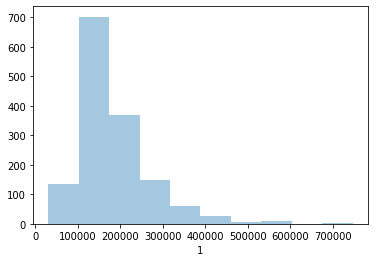

In [0]:
testpf =([item['predictions'][0] for item in Test_PF])
#print(test_predictions)
main =[]
k=1461
for i in range(len(testpf)):
  l=[k+i,testpf[i]]
  main.append(l)
df = pd.DataFrame(main)
sns.distplot(df[1], bins=10, kde=False)
#

In [0]:
df.to_csv('/content/drive/My Drive/House Price Prediction/submission_Boosted_Trees_Regressor.csv', index=False)